# Quantum kernel with entangled qubit feature map 



<img src="./logo_circular.png" width="20" height="20" />@by claudio<br>
nonlinearxwaves@gmail.com<br>


@created 21 jan 2022
<br>@version 8 apr 2022

# Set path

In [1]:
import os
ROOT_DIR = os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.curdir))))
ROOT_DIR='/home/claudio/Dropbox/incorso/QUOMPLEX2018/QUOMPLEX2020PYTHON'
os.chdir(ROOT_DIR)

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /home/claudio/Dropbox/incorso/QUOMPLEX2018/QUOMPLEX2020PYTHON


# Various import

In [2]:
import tensorflow as tf
import numpy as np
from quomplex2021.utilities import utilities as u
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

2022-04-08 05:48:19.803258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-08 05:48:19.803283: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
mytype=tf.complex64 # maybe useful

## Define the single qubit

In [4]:
qubit0 = tf.constant([1,0],dtype=mytype)
print(qubit0)

tf.Tensor([1.+0.j 0.+0.j], shape=(2,), dtype=complex64)


2022-04-08 05:48:21.790952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-08 05:48:21.790974: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-08 05:48:21.790991: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x1): /proc/driver/nvidia/version does not exist
2022-04-08 05:48:21.791260: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
qubit1 = tf.constant([0,1],dtype=mytype)
print(qubit1)

tf.Tensor([0.+0.j 1.+0.j], shape=(2,), dtype=complex64)


Can define any state as a linear combination of qubit0 and qubit1

In [6]:
psi=1.0*qubit0+3j*qubit1
print(psi)

tf.Tensor([1.+0.j 0.+3.j], shape=(2,), dtype=complex64)


# Scalar product for the single qubit

In [7]:
@tf.function
def Scalar(psi, phi):
    """ Compute the scalar product of states """
    cpsi = tf.math.conj(psi)
    sc =tf.math.reduce_sum(tf.multiply(cpsi, phi))
    return sc

In [8]:
Scalar(psi,psi)

<tf.Tensor: shape=(), dtype=complex64, numpy=(10+0j)>

In [9]:
Scalar(qubit0,qubit1)

<tf.Tensor: shape=(), dtype=complex64, numpy=0j>

In [10]:
Scalar(qubit0,qubit0)

<tf.Tensor: shape=(), dtype=complex64, numpy=(1+0j)>

# Define the I,X,Y,Z,H gate

## Single Q-bit identity

In [11]:
Isingle = tf.constant([[1,0],[0,1]],dtype=mytype)

## X gate for the single qbit

In [12]:
Xsingle =tf.constant([[0, 1],[1, 0]],dtype=mytype)
print(Xsingle)

tf.Tensor(
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]], shape=(2, 2), dtype=complex64)


## Y gate for the single qbit

In [13]:
Y_np=np.array([[0.0, complex(0,-1)],[complex(0,1), 0.0]],dtype=np.complex64)

In [14]:
Y_np

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]], dtype=complex64)

In [15]:
Ysingle =tf.constant(np.array([[0.0,-1j],[1j,0.0]]),dtype=tf.complex64)
print(Ysingle)

tf.Tensor(
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]], shape=(2, 2), dtype=complex64)


## Single Q-bit Z gate

In [16]:
Zsingle =tf.constant([[1, 0],[0, -1]],dtype=tf.complex64)
print(Zsingle)

tf.Tensor(
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]], shape=(2, 2), dtype=complex64)


# Define the Hadamard Gate

## Hadamard Gate for the single qubit

In [17]:
Hsingle= tf.constant([[1/np.sqrt(2), 1/np.sqrt(2)],[1/np.sqrt(2), -1/np.sqrt(2)]],dtype=tf.complex64)
print(Hsingle)

tf.Tensor(
[[ 0.70710677+0.j  0.70710677+0.j]
 [ 0.70710677+0.j -0.70710677+0.j]], shape=(2, 2), dtype=complex64)


Test the Hadamard gate on $|0\rangle$

In [18]:
tf.tensordot(Hsingle,qubit0,axes=[[1],[0]])

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([0.70710677+0.j, 0.70710677+0.j], dtype=complex64)>

Different notation

In [19]:
tf.tensordot(Hsingle,qubit0,axes=1)

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([0.70710677+0.j, 0.70710677+0.j], dtype=complex64)>

Compute $\hat{\rm Z}\hat{\rm H}|0\rangle$

In [20]:
ZH0=tf.tensordot(Zsingle,tf.tensordot(Hsingle,qubit0,axes=1),axes=1)

In [21]:
print(ZH0)

tf.Tensor([ 0.70710677+0.j -0.70710677+0.j], shape=(2,), dtype=complex64)


In [22]:
Scalar(ZH0,ZH0)

<tf.Tensor: shape=(), dtype=complex64, numpy=(0.99999994+0j)>

# Operator Exponent of Z

In [23]:
def EZ(theta):
    """ return exp(1j theta Z) """
    ct = tf.cast(tf.math.cos(theta), dtype=tf.complex64)
    st = tf.cast(tf.math.sin(theta), dtype=tf.complex64)
    EZS = ct*Isingle+1j*st*Zsingle
    return EZS

Test

In [24]:
tf.tensordot(EZ(np.pi),qubit0,axes=1)

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([-1.-8.742278e-08j,  0.+0.000000e+00j], dtype=complex64)>

In [25]:
tf.tensordot(EZ(np.pi/2),qubit0,axes=1)

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([-4.371139e-08+1.j,  0.000000e+00+0.j], dtype=complex64)>

In [26]:
tf.tensordot(EZ(np.pi/2),qubit1,axes=1)

<tf.Tensor: shape=(2,), dtype=complex64, numpy=array([ 0.000000e+00+0.j, -4.371139e-08-1.j], dtype=complex64)>

# Define X gate 

## X gate for the single qbit

In [27]:
Xsingle =tf.constant([[0, 1],[1, 0]],dtype=mytype)
print(Zsingle)

tf.Tensor(
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]], shape=(2, 2), dtype=complex64)


## Exponent of the X gate

In [28]:
thetaX=tf.Variable(0.3,dtype=tf.float32)

In [29]:
EthetaXsingle=tf.cast(tf.math.cos(thetaX),dtype=tf.complex64)*Isingle+1j*tf.cast(tf.math.sin(thetaX), dtype=tf.complex64)*Xsingle

# Define Y gate 

## Y gate for the single qbit

In [30]:
Y_np=np.array([[0.0, complex(0,-1)],[complex(0,1), 0.0]],dtype=np.complex64)

In [31]:
Y_np

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]], dtype=complex64)

In [32]:
Ysingle =tf.constant(Y_np,dtype=mytype)
print(Ysingle)

tf.Tensor(
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]], shape=(2, 2), dtype=complex64)


## Exponent of the Y gate

In [33]:
thetaY=tf.Variable(-0.7,dtype=tf.float32)

In [34]:
EthetaYsingle=tf.cast(tf.math.cos(thetaY),dtype=tf.complex64)*Isingle+1j*tf.cast(tf.math.sin(thetaY), dtype=tf.complex64)*Ysingle

# Two qubits

Define $|0\rangle \otimes |0 \rangle$

In [35]:
q00 = tf.tensordot(qubit0,qubit0,axes=0);
print(q00)

tf.Tensor(
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]], shape=(2, 2), dtype=complex64)


Define $|0\rangle \otimes |1 \rangle$

In [36]:
q01 = tf.tensordot(qubit0,qubit1,axes=0);
print(q01)

tf.Tensor(
[[0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j]], shape=(2, 2), dtype=complex64)


Define $|1\rangle \otimes |0 \rangle$

In [37]:
q10 = tf.tensordot(qubit1,qubit0,axes=0);
print(q10)

tf.Tensor(
[[0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j]], shape=(2, 2), dtype=complex64)


Define $|1\rangle \otimes |1 \rangle$

In [38]:
q11 = tf.tensordot(qubit1,qubit1,axes=0);
print(q11)

tf.Tensor(
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]], shape=(2, 2), dtype=complex64)


Linear combinations (not normalized)

In [39]:
q01+q10

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]], dtype=complex64)>

In [40]:
q00+3j*q11

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+3.j]], dtype=complex64)>

# Define the Hadamard Gate

## Hadamard Gate for two qubits as an outer tensor product

In [41]:
HH=tf.tensordot(Hsingle,Hsingle,axes=0)
print(HH)

tf.Tensor(
[[[[ 0.49999997+0.j  0.49999997+0.j]
   [ 0.49999997+0.j -0.49999997+0.j]]

  [[ 0.49999997+0.j  0.49999997+0.j]
   [ 0.49999997+0.j -0.49999997+0.j]]]


 [[[ 0.49999997+0.j  0.49999997+0.j]
   [ 0.49999997+0.j -0.49999997+0.j]]

  [[-0.49999997+0.j -0.49999997+0.j]
   [-0.49999997+0.j  0.49999997+0.j]]]], shape=(2, 2, 2, 2), dtype=complex64)


## Apply the Hadamard gate to $|00\rangle$

In [42]:
tf.tensordot(HH,q00, axes=[[1,3],[0, 1]]),

(<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
 array([[0.49999997+0.j, 0.49999997+0.j],
        [0.49999997+0.j, 0.49999997+0.j]], dtype=complex64)>,)

# Define a function for applying a gate

In [43]:
@tf.function
def gate(A,psi):
    """ A tf.function for applying a gate to a state """
    return tf.tensordot(A,psi, axes=[[1,3],[0,1]])

### Apply the H gate on the $|00\rangle$ and store the resulting state

In [44]:
Hq00=gate(HH,q00)

In [45]:
print(Hq00)

tf.Tensor(
[[0.49999997+0.j 0.49999997+0.j]
 [0.49999997+0.j 0.49999997+0.j]], shape=(2, 2), dtype=complex64)


# CNOT gate

In [46]:
CNOT_np=np.zeros((2,2,2,2))
CNOT_np[0,0,0,0]=1
CNOT_np[0,0,1,1]=1
CNOT_np[1,1,0,1]=1
CNOT_np[1,1,1,0]=1

In [47]:
CNOT = tf.constant(CNOT_np,dtype=tf.complex64)

In [48]:
CNOT

<tf.Tensor: shape=(2, 2, 2, 2), dtype=complex64, numpy=
array([[[[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]],

        [[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]]],


       [[[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]],

        [[0.+0.j, 1.+0.j],
         [1.+0.j, 0.+0.j]]]], dtype=complex64)>

#### Show a 2D version of CNOT (optional)

In [49]:
tf.transpose(CNOT,perm=[1,3,0,2])

<tf.Tensor: shape=(2, 2, 2, 2), dtype=complex64, numpy=
array([[[[1.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]],

        [[0.+0.j, 1.+0.j],
         [0.+0.j, 0.+0.j]]],


       [[[0.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]],

        [[0.+0.j, 0.+0.j],
         [1.+0.j, 0.+0.j]]]], dtype=complex64)>

In [50]:
print(tf.reshape(CNOT,(4,4)))

tf.Tensor(
[[1.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j]], shape=(4, 4), dtype=complex64)


In [51]:
print(tf.reshape(tf.transpose(CNOT,perm=[1,3,0,2]),(4,4)))

tf.Tensor(
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]], shape=(4, 4), dtype=complex64)


Reshape does not cust in the proper way, need to transpose some column first

In [52]:
@tf.function
def transform(A):
    """ reshape an operator as 4x4 """
    return (tf.reshape(tf.transpose(A,perm=[1,3,0,2]),(4,4)))

In [53]:
print(transform(CNOT))

tf.Tensor(
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]], shape=(4, 4), dtype=complex64)


## Test CNOT

In [54]:
gate(CNOT, q00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)>

In [55]:
gate(CNOT, q11)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j]], dtype=complex64)>

In [56]:
gate(CNOT,q01+q10)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j]], dtype=complex64)>

In [57]:
gate(HH, Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.9999999+0.j, 0.       +0.j],
       [0.       +0.j, 0.       +0.j]], dtype=complex64)>

# Define the two-qubit gates with Z

## $Z_0\otimes Z_1$ gate as a tensor product

In [58]:
ZZ = tf.tensordot(Zsingle,Zsingle,axes=0)
print(ZZ)

tf.Tensor(
[[[[ 1.+0.j  0.+0.j]
   [ 0.+0.j -1.+0.j]]

  [[ 0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j]]]


 [[[ 0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j]]

  [[-1.+0.j  0.+0.j]
   [ 0.+0.j  1.+0.j]]]], shape=(2, 2, 2, 2), dtype=complex64)


## Operator $Z_0\otimes I_1$ ( Z on first qubit)

In [59]:
Z0 = tf.tensordot(Zsingle, Isingle,axes=0)
print(Z0)

tf.Tensor(
[[[[ 1.+0.j  0.+0.j]
   [ 0.+0.j  1.+0.j]]

  [[ 0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j]]]


 [[[ 0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j]]

  [[-1.+0.j  0.+0.j]
   [ 0.+0.j -1.+0.j]]]], shape=(2, 2, 2, 2), dtype=complex64)


## Operator $I_0\otimes Z_1$ (Z on the second qbuit)

In [60]:
Z1 = tf.tensordot(Isingle, Zsingle,axes=0)
print(Z1)

tf.Tensor(
[[[[ 1.+0.j  0.+0.j]
   [ 0.+0.j -1.+0.j]]

  [[ 0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j]]]


 [[[ 0.+0.j  0.+0.j]
   [ 0.+0.j  0.+0.j]]

  [[ 1.+0.j  0.+0.j]
   [ 0.+0.j -1.+0.j]]]], shape=(2, 2, 2, 2), dtype=complex64)


**Remark the Z0 and Z1 are different ! the outer tensor product takes into account order in the order of the indices !**

## Test Z-gate

In [61]:
gate(Z0,q00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)>

In [62]:
gate(Z1,q00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)>

In [63]:
gate(ZZ, q00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)>

In [64]:
gate(ZZ, Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[ 0.49999997+0.j, -0.49999997+0.j],
       [-0.49999997+0.j,  0.49999997+0.j]], dtype=complex64)>

In [65]:
gate(Z0, Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[ 0.49999997+0.j,  0.49999997+0.j],
       [-0.49999997+0.j, -0.49999997+0.j]], dtype=complex64)>

In [66]:
gate(Z1, Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[ 0.49999997+0.j, -0.49999997+0.j],
       [ 0.49999997+0.j, -0.49999997+0.j]], dtype=complex64)>

# Operator exponent of Z

## Exponent of Z in a single Q bit  $e^{\imath \theta_z Z}$

In [67]:
Zsingle_complex=tf.constant(1j*Zsingle.numpy(),dtype=tf.complex64)
print(Zsingle_complex)

tf.Tensor(
[[ 0.+1.j  0.+0.j]
 [ 0.+0.j -0.-1.j]], shape=(2, 2), dtype=complex64)


In [68]:
thetaZ=tf.Variable(1.1,dtype=tf.float32)

### Use the exponent of matrix function

In [69]:
tf.linalg.expm(1j*tf.cast(thetaZ, dtype=tf.complex64)*tf.cast(Zsingle,dtype=tf.complex64))

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.45359603+0.89120734j, 0.        +0.j        ],
       [0.        +0.j        , 0.45359603-0.89120734j]], dtype=complex64)>

### Use the identity $e^{\imath \theta_Z Z}=cos(\theta_Z)I+\imath sin(\theta_Z)Z$

In [70]:
EthetaZsingle=tf.cast(tf.math.cos(thetaZ),dtype=tf.complex64)*Isingle+1j*tf.cast(tf.math.sin(thetaZ), dtype=tf.complex64)*Zsingle

In [71]:
print(EthetaZsingle)

tf.Tensor(
[[0.4535961+0.8912074j 0.       +0.j       ]
 [0.       +0.j        0.4535961-0.8912074j]], shape=(2, 2), dtype=complex64)


## Exponent of Z0 only $e^{\imath \theta_Z Z}\otimes I$

In [72]:
expZ0=tf.tensordot(EthetaZsingle, Isingle,axes=0)

### Test gate

In [73]:
gate(expZ0, q00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.4535961+0.8912074j, 0.       +0.j       ],
       [0.       +0.j       , 0.       +0.j       ]], dtype=complex64)>

In [74]:
gate(expZ0, Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.22679803+0.44560367j, 0.22679803+0.44560367j],
       [0.22679803-0.44560367j, 0.22679803-0.44560367j]], dtype=complex64)>

## Exponent of Z1 only $I\otimes e^{\imath \theta_Z Z}$

In [75]:
expZ1=tf.tensordot(Isingle, EthetaZsingle,axes=0)

### Test gate

In [76]:
gate(expZ1, q00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.4535961+0.8912074j, 0.       +0.j       ],
       [0.       +0.j       , 0.       +0.j       ]], dtype=complex64)>

In [77]:
gate(expZ1, Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.22679803+0.44560367j, 0.22679803-0.44560367j],
       [0.22679803+0.44560367j, 0.22679803-0.44560367j]], dtype=complex64)>

## Exponent of X0 only $e^{\imath \theta_X X}\otimes I$

In [78]:
expX0=tf.tensordot(EthetaXsingle, Isingle,axes=0)

## Exponent of X1 only $I\otimes e^{\imath \theta_X X}$

In [79]:
expX1=tf.tensordot(Isingle, EthetaXsingle,axes=0)

## Exponent of Y0 only $e^{\imath \theta_Y Y}\otimes I$

In [80]:
expY0=tf.tensordot(EthetaYsingle, Isingle,axes=0)

## Exponent of X1 only $I\otimes e^{\imath \theta_Y Y}$

In [81]:
expY1=tf.tensordot(Isingle, EthetaYsingle,axes=0)

## Exponent of ZZ $e^{\imath \theta_{01} Z_0\otimes Z_1}$

In [82]:
II = tf.tensordot(Isingle, Isingle, axes=0)
II

<tf.Tensor: shape=(2, 2, 2, 2), dtype=complex64, numpy=
array([[[[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]],

        [[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]]],


       [[[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]],

        [[1.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]]]], dtype=complex64)>

In [83]:
theta01=tf.Variable(1.1, dtype=tf.float32)

In [84]:
expZ0Z1 = tf.cast(tf.math.cos(theta01),dtype=mytype)*II+1j*ZZ*tf.cast(tf.math.sin(theta01),dtype=mytype)

In [85]:
print(transform(expZ0Z1))

tf.Tensor(
[[0.4535961+0.8912074j 0.       +0.j        0.       +0.j
  0.       +0.j       ]
 [0.       +0.j        0.4535961-0.8912074j 0.       +0.j
  0.       +0.j       ]
 [0.       +0.j        0.       +0.j        0.4535961-0.8912074j
  0.       +0.j       ]
 [0.       +0.j        0.       +0.j        0.       +0.j
  0.4535961+0.8912074j]], shape=(4, 4), dtype=complex64)


In [86]:
u.printonscreen(transform(expZ0Z1))

+0.5+0.9i +0.0+0.0i +0.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.5-0.9i +0.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +0.5-0.9i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +0.0+0.0i +0.5+0.9i 


# Feature MAP

## Redefine the operators as functions

In [87]:
@tf.function
def expZ0(theta):
    """ return exp(theta Z0) I """
    tc = tf.cast(theta,dtype=tf.complex64)
    EZS=tf.math.cos(tc)*Isingle+1j*tf.math.sin(tc)*Zsingle
    EZ0=tf.tensordot(EZS, Isingle,axes=0)
    return EZ0

@tf.function
def expX0(theta):
    """ return exp(theta X0) I """
    tc = tf.cast(theta,dtype=tf.complex64)
    EXS=tf.math.cos(tc)*Isingle+1j*tf.math.sin(tc)*Xsingle
    EX0=tf.tensordot(EXS, Isingle,axes=0)
    return EX0

@tf.function
def expY0(theta):
    """ return exp(theta Y0) I """
    tc = tf.cast(theta,dtype=tf.complex64)
    EYS=tf.math.cos(tc)*Isingle+1j*tf.math.sin(tc)*Ysingle
    EY0=tf.tensordot(EYS, Isingle,axes=0)
    return EY0


@tf.function
def expZ1(theta):
    """ return I exp(theta Z1) """
    tc = tf.cast(theta,dtype=tf.complex64)
    EZS=tf.math.cos(tc)*Isingle+1j*tf.math.sin(tc)*Zsingle
    EZ0=tf.tensordot(Isingle,EZS, axes=0)
    return EZ0


@tf.function
def expX1(theta):
    """ return I exp(theta X1) """
    tc = tf.cast(theta,dtype=tf.complex64)
    EXS=tf.math.cos(tc)*Isingle+1j*tf.math.sin(tc)*Xsingle
    EX0=tf.tensordot(Isingle, EXS,axes=0)
    return EX0

@tf.function
def expY1(theta):
    """ return I exp(theta Y1) """
    tc = tf.cast(theta,dtype=tf.complex64)
    EYS=tf.math.cos(tc)*Isingle+1j*tf.math.sin(tc)*Ysingle
    EY0=tf.tensordot(Isingle, EYS,axes=0)
    return EY0

@tf.function
def expZZ(theta):
    """ return exp(theta Z0 Z1) """
    tc = tf.cast(theta,dtype=tf.complex64)
    EZZ=tf.math.cos(tc)*II+1j*ZZ*tf.math.sin(tc)
    return EZZ


### test the function

In [88]:
gate(expZ0(np.pi), Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-0.49999997-4.3711385e-08j, -0.49999997-4.3711385e-08j],
       [-0.49999997+4.3711385e-08j, -0.49999997+4.3711385e-08j]],
      dtype=complex64)>

In [89]:
gate(expZ1(np.pi), Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[-0.49999997-4.3711385e-08j, -0.49999997+4.3711385e-08j],
       [-0.49999997-4.3711385e-08j, -0.49999997+4.3711385e-08j]],
      dtype=complex64)>

In [90]:
gate(expZZ(1.1),Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.22679803+0.44560367j, 0.22679803-0.44560367j],
       [0.22679803-0.44560367j, 0.22679803+0.44560367j]], dtype=complex64)>

In [91]:
gate(expZ0Z1,Hq00)

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[0.22679803+0.44560367j, 0.22679803-0.44560367j],
       [0.22679803-0.44560367j, 0.22679803+0.44560367j]], dtype=complex64)>

# Define the feature map

In [92]:
@tf.function
def FeatureMapU(psi, theta):
    thetaZ0=theta[0]
    thetaZ1=theta[1]
    thetaZZ=theta[2]
    psi=gate(HH,psi)
    psi=gate(expZ1(thetaZ0),psi)
    psi=gate(expZ0(thetaZ1),psi)
    psi=gate(expZZ(thetaZZ),psi)
    return psi

## Repeated feature map

In [93]:
@tf.function
def FeatureMapUU(psi, theta):
    psi = FeatureMapU(psi, theta)
    psi = FeatureMapU(psi, theta)
    return psi

In [94]:
q00

<tf.Tensor: shape=(2, 2), dtype=complex64, numpy=
array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]], dtype=complex64)>

# Test the feature map

In [95]:
angles =np.random.random(3)
Upsi=FeatureMapUU(q00, angles)

In [96]:
print(angles)
print(Upsi)

[0.73907611 0.02428857 0.51699408]
tf.Tensor(
[[ 0.19168626+0.6130926j   0.54912853+0.20304589j]
 [-0.32942086-0.05010636j  0.07527575+0.35764298j]], shape=(2, 2), dtype=complex64)


## compute the norm of Upsi

In [97]:
Scalar(Upsi,Upsi)

<tf.Tensor: shape=(), dtype=complex64, numpy=(0.9999996+0j)>

# Define the kernel function

## Map x to theta

In [98]:
def MapTheta(x):
    """ take a two vector and return a theta vector """
    theta0=x[0]
    theta1=x[1]
    theta01=(np.pi-x[0])*(np.pi-x[1])
    return [theta0, theta1,theta01]

## Kernel function

In [99]:
def Kernel_np(xA_np,xB_np):
    """ compute the Kernel function """
    nb1, nx= xA_np.shape
    nb2, ny= xB_np.shape
    out = np.zeros((nb1,nb2))
    for i1 in range(nb1):
        for i2 in range(nb2):
            xB=[tf.constant(xB_np[i2,0]),tf.constant(xB_np[i2,1])]
            xA=[tf.constant(xA_np[i1,0]),tf.constant(xA_np[i1,1])]
            thetaA=MapTheta(xA)
            thetaB=MapTheta(xB)
            psiA=FeatureMapUU(q00,thetaA)
            psiB=FeatureMapUU(q00,thetaB)
            sc=Scalar(psiA,psiB)
            abs2 = tf.square(tf.abs(sc))
            out[i1,i2]=abs2.numpy()
    return out

## Plot the kernel function

### Compute the kernel function in many points

In [100]:
%%time
nplot=100
x1 =np.zeros([nplot,2])
x2 =np.zeros([nplot,2])
x1[:,0] = np.linspace(-2*np.pi,2*np.pi,nplot)
x1[:,1] = np.linspace(-2*np.pi,2*np.pi,nplot)

# Compute data for coherent state kernel
COEPLOT=np.zeros((nplot,nplot))
x1tmp=np.zeros((1,2))
x2tmp=np.zeros((1,2))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        COEPLOT[i1,i2]=Kernel_np(x1tmp,x2tmp)
    

CPU times: user 10.5 s, sys: 382 ms, total: 10.9 s
Wall time: 9.09 s


# Plot the kernel function

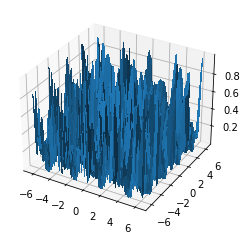

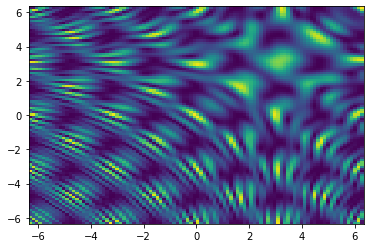

In [101]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
[X,Y]=np.meshgrid(x1[:,0],x1[:,1])
surf = ax.plot_surface(X,Y , COEPLOT, antialiased=False, linewidth=0)
plt.savefig('./kernelQubits.pdf', format='pdf')
#plt.show()
fig, ax= plt.subplots()
plt.pcolor(X,Y,COEPLOT)
plt.savefig('./kernelQubits2.pdf', format='pdf')

# Create dataset

In [102]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [103]:
datasets = [
    make_moons(noise=0.1, random_state=0),
    make_circles(noise=0.1, factor=0.5, random_state=1),
]

In [104]:
classifiers = [
    SVC(kernel=Kernel_np),
]
names=['EntangledQubits']

# Fit

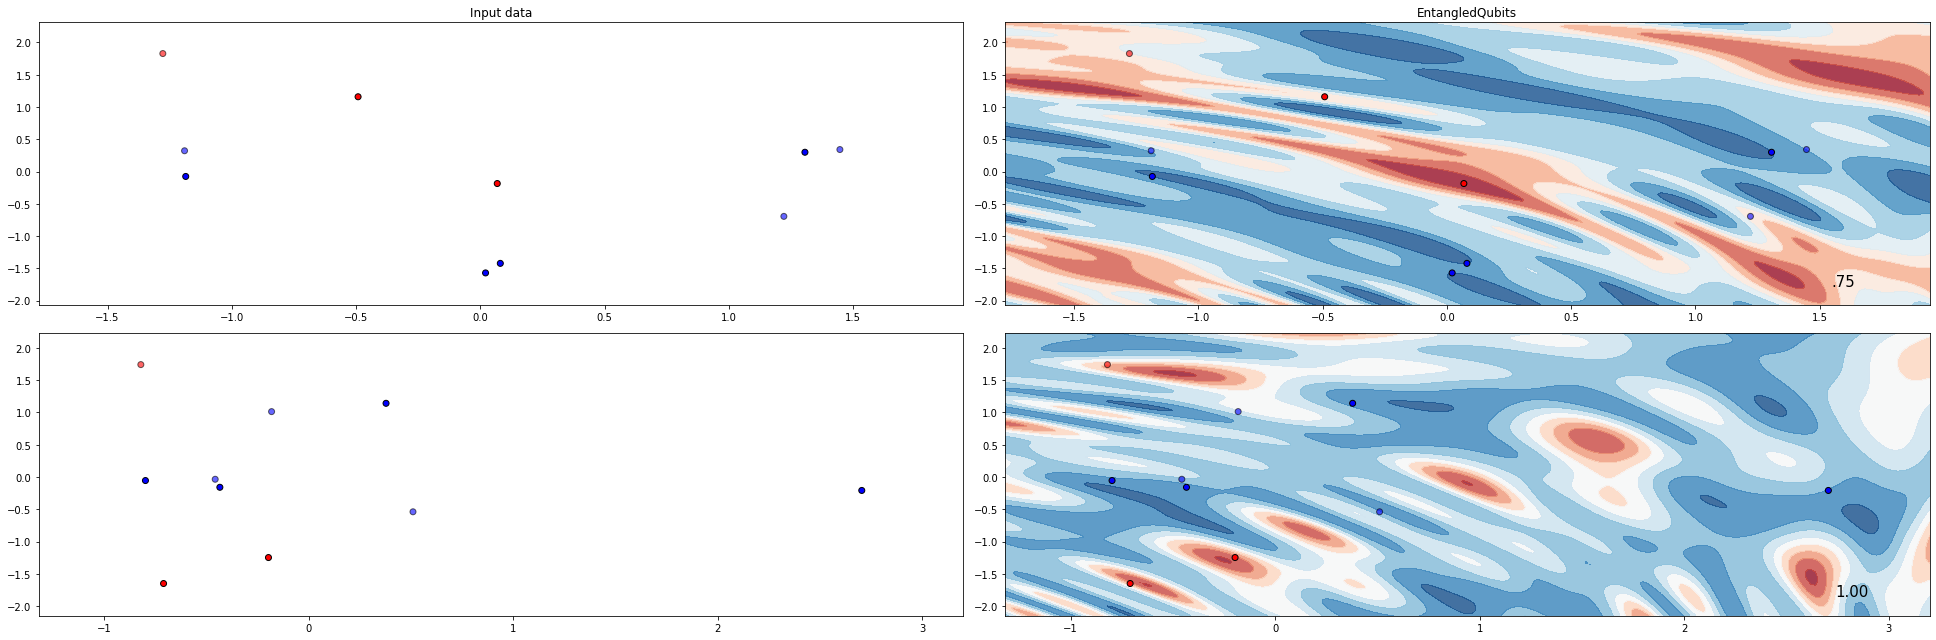

CPU times: user 10min 23s, sys: 24.8 s, total: 10min 48s
Wall time: 9min 10s


In [105]:
%%time
datapoints=10
h = 0.02  # step size in the mesh
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X=X[:datapoints,:]
    y=y[:datapoints]
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:,
                                   1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        #ax.set_xticks(())
        #ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
#lt.savefig('./jupyternotebooks/quantumfeaturemap/EntangledQubit.pdf', format='pdf')
plt.show() #remark, plt.show() must come after plt.savefig

In [106]:
clf.score(X_train, y_train)

1.0

In [107]:
print(clf.predict(X_train[:3,:]))

[1 0 1]
